In [1]:
import tensorflow as tf

from data_loader.pascal_voc_2012_loader import PascalVocLoader
from data_loader.kitti_road_data_loader import KittiRoadLoader

from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

json_file = "configs/unet_PASCALVoc2012_config.json"
# json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: sparse_categorical_crossentropy
batch_size: 4
checkpoint_dir: ./experiments\unet_pascalvoc2012\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/PASCAL_VOC/VOCdevkit/VOC2012
exp_name: unet_pascalvoc2012
final_model_dir: ./experiments\unet_pascalvoc2012\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: scce
max_to_keep: 5
n_classes: 21
num_epochs: 30
num_iter_per_epoch: 200
summary_dir: ./experiments\unet_pascalvoc2012\summary/
train_size: 1600
valid_size: 20



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/PASCAL_VOC/VOCdevkit/VOC2012
Size of all raw images :  1464  samples
Size of all raw labels  :  1464  samples
Size of all raw masks  :  1464  samples
Pre-processing the data...
Size of images collection :  (2220, 320, 480, 3)
Size of masks collection :  (2220, 320, 480)


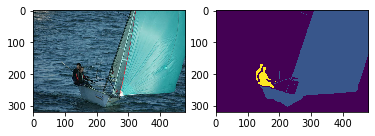

In [2]:
data = PascalVocLoader(config)
# data = KittiRoadLoader(config)

img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

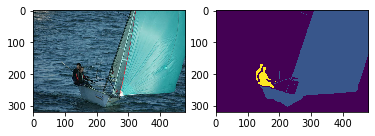

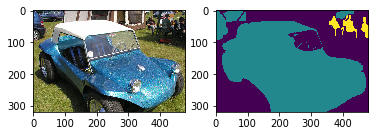

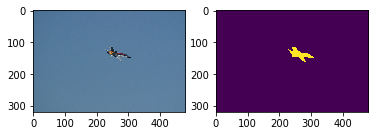

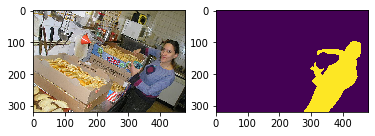

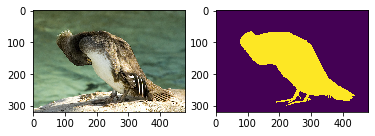

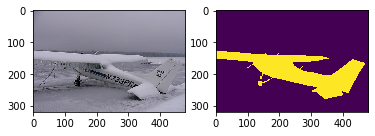

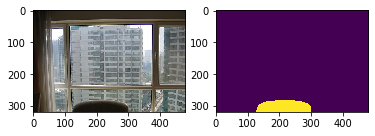

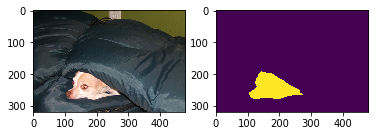

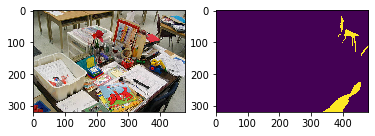

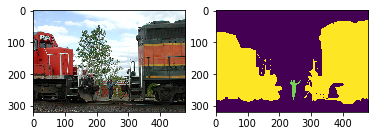

In [3]:
for i in range (10) : 
    img, mask = data.get_data_element("train_data",i)
    plt.subplot(121)
    plt.imshow(img)
    plt.subplot(122)
    plt.imshow(mask)
    plt.show()

In [4]:
tf.reset_default_graph()

model = UNetModel(config)
model.build() 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.
Model built successfully.


In [5]:
# create a builder for saving the model 
builder = tf.saved_model.builder.SavedModelBuilder(config.final_model_dir)

In [ ]:
sess = tf.Session()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
trainer.train()

Variables initialized
Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:06<00:00,  4.75s/it]


-->Last epoch loss     :  1.78852
-->Last epoch accuracy :  0.669538
-->Last test loss      :  1.83458
-->Last test accuracy  :  0.618837
[BEST LOST : 1.8345755338668823]
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:46<00:00,  4.70s/it]


-->Last epoch loss     :  1.44043
-->Last epoch accuracy :  0.730725
-->Last test loss      :  1.75479
-->Last test accuracy  :  0.619066
[BEST LOST : 1.7547922134399414]
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:01<00:00,  4.93s/it]


-->Last epoch loss     :  1.32274
-->Last epoch accuracy :  0.738591
-->Last test loss      :  1.73812
-->Last test accuracy  :  0.619066
[BEST LOST : 1.7381205558776855]
Saving model...
Model saved
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:50<00:00,  4.71s/it]


-->Last epoch loss     :  1.303
-->Last epoch accuracy :  0.732216
-->Last test loss      :  1.65562
-->Last test accuracy  :  0.619066
[BEST LOST : 1.6556249856948853]
Saving model...
Model saved
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:02<00:00,  4.82s/it]


-->Last epoch loss     :  1.31674
-->Last epoch accuracy :  0.730607
-->Last test loss      :  1.73527
-->Last test accuracy  :  0.619066
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:35<00:00,  4.85s/it]


-->Last epoch loss     :  1.26054
-->Last epoch accuracy :  0.739101
-->Last test loss      :  1.65611
-->Last test accuracy  :  0.619066
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:17<00:00,  4.89s/it]


-->Last epoch loss     :  1.26078
-->Last epoch accuracy :  0.734925
-->Last test loss      :  1.69485
-->Last test accuracy  :  0.619066
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:48<00:00,  4.66s/it]


-->Last epoch loss     :  1.25241
-->Last epoch accuracy :  0.739653
-->Last test loss      :  1.63436
-->Last test accuracy  :  0.619066
[BEST LOST : 1.6343649625778198]
Saving model...
Model saved
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:36<00:00,  4.66s/it]


-->Last epoch loss     :  1.18974
-->Last epoch accuracy :  0.7501
-->Last test loss      :  1.66236
-->Last test accuracy  :  0.619066
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [57:37<00:00,  4.66s/it]


-->Last epoch loss     :  1.28282
-->Last epoch accuracy :  0.726812
-->Last test loss      :  1.67572
-->Last test accuracy  :  0.619066
Epoch  10


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [15:35<00:00,  4.78s/it]


-->Last epoch loss     :  1.25011
-->Last epoch accuracy :  0.737018
-->Last test loss      :  1.72826
-->Last test accuracy  :  0.619066
Epoch  11


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:15<00:00,  4.74s/it]


-->Last epoch loss     :  1.22976
-->Last epoch accuracy :  0.736718
-->Last test loss      :  1.63217
-->Last test accuracy  :  0.619066
[BEST LOST : 1.6321699619293213]
Saving model...
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Model saved
Epoch  12


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:03<00:00,  4.91s/it]


-->Last epoch loss     :  1.21236
-->Last epoch accuracy :  0.73738
-->Last test loss      :  1.62274
-->Last test accuracy  :  0.619066
[BEST LOST : 1.6227420568466187]
Saving model...
Model saved
Epoch  13


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:11<00:00,  4.79s/it]


-->Last epoch loss     :  1.2244
-->Last epoch accuracy :  0.739691
-->Last test loss      :  1.75368
-->Last test accuracy  :  0.619066
Epoch  14


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [16:07<00:00,  4.89s/it]


-->Last epoch loss     :  1.23337
-->Last epoch accuracy :  0.730337
-->Last test loss      :  1.66282
-->Last test accuracy  :  0.619066
Epoch  15


 65%|████████████████████████████████████████████████████                            | 130/200 [10:27<05:37,  4.83s/it]

In [ ]:
model.load(sess)
print("Saving the final model..")
builder.add_meta_graph_and_variables(sess,
                                   [tf.saved_model.tag_constants.TRAINING],
                                   signature_def_map=None,
                                   assets_collection=None)
builder.save()
print("Final model saved")

In [ ]:
model.load(sess)
print(model.best_loss.eval(sess))
test = [data.get_data_element("test_data",i) for i in range(5)]
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [ ]:
# sess.close()

In [ ]:
# tf.reset_default_graph()

# model = UNetModel(config)
# model.build() 
# with tf.Session() as sess :
#     model.load(sess)
#     test = [data.get_data_element("test_data",i) for i in range(5)]
#     for item in test :
#         img = item[0]
#         mask = item[1]
#         model.predict(sess,img,mask)